In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fe69d812-d0c5-4ba5-8527-440698090c4e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-04T12:56:03.774Z', 'error_code': 0, 'error_message': None, 'elapsed': 43, 'credit_count': 1, 'notice': None, 'total_count': 9871}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11023, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [7]:
type(data)

dict

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11023,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969387e+07,1.969387e+07,False,NaN,1,NaN,NaN,None,2024-05-04T12:55:00.000Z,63920.778286,3.166514e+10,10.9291,0.158858,5.500492,1.387163,-4.111617,-5.010692,48.634429,1.258847e+12,53.3925,1.342336e+12,None,2024-05-04T12:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 14:56:08.863088
1,1027,Ethereum,ETH,ethereum,8893,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200958e+08,1.200958e+08,True,NaN,2,NaN,NaN,None,2024-05-04T12:54:00.000Z,3148.965687,1.162549e+10,-1.5012,0.709661,3.899801,0.342888,-5.967538,-16.185249,36.650989,3.781775e+11,16.0390,3.781775e+11,None,2024-05-04T12:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 14:56:08.863088
2,825,Tether USDt,USDT,tether,84627,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.107691e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-04T12:54:00.000Z,1.000197,5.214311e+10,5.7861,-0.089568,0.033800,0.085779,0.033444,-0.050475,0.034117,1.107909e+11,4.6988,1.131088e+11,None,2024-05-04T12:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-04 14:56:08.863088
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475875e+08,1.475875e+08,False,NaN,4,NaN,NaN,None,2024-05-04T12:54:00.000Z,591.816599,7.691248e+08,1.1156,0.351178,3.727298,0.665174,0.634418,40.913301,97.249633,8.734473e+10,3.7046,8.734473e+10,None,2024-05-04T12:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 14:56:08.863088
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.473270e+08,5.752306e+08,True,NaN,5,NaN,NaN,None,2024-05-04T12:54:00.000Z,147.685158,3.286360e+09,5.5183,0.566488,4.572523,7.547323,-21.182422,12.018540,50.656340,6.606355e+10,2.8018,8.495302e+10,None,2024-05-04T12:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 14:56:08.863088
5,3408,USDC,USDC,usd-coin,18860,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.351648e+10,3.351648e+10,False,NaN,6,NaN,NaN,None,2024-05-04T12:54:00.000Z,1.000096,7.008894e+09,2.4187,-0.046708,0.011703,0.018577,0.037108,0.001267,-0.018894,3.351969e+10,1.4216,3.351969e+10,None,2024-05-04T12:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-04 14:56:08.863088
6,52,XRP,XRP,xrp,1311,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,None,2024-05-04T12:55:00.000Z,0.536663,8.844266e+08,-18.7198,0.526506,2.607642,4.029797,-7.194101,-17.453109,4.573529,2.964305e+10,1.2572,5.366626e+10,None,2024-05-04T12:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 14:56:08.863088
7,74,Dogecoin,DOGE,dogecoin,960,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.441508e+11,1.441508e+11,True,NaN,8,NaN,NaN,None,2024-05-04T12:55:00.000Z,0.163527,2.039161e+09,74.2159,4.208264,19.099768,12.704435,-11.175929,-11.881498,106.763512,2.357257e+10,0.9994,2.357257e+10,None,2024-05-04T12:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 14:56:08.863088
8,11419,Toncoin,TON,toncoin,312,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.473209e+09,5.106129e

In [23]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'fe69d812-d0c5-4ba5-8527-440698090c4e',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Diellza\Desktop\Data Analisys Protfolio Projects\Web Scraping\Cryptocurrency API data scraping\CryptoAPI.csv'):
        df.to_csv(r'C:\Users\Diellza\Desktop\Data Analisys Protfolio Projects\Web Scraping\Cryptocurrency API data scraping\CryptoAPI.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Diellza\Desktop\Data Analisys Protfolio Projects\Web Scraping\Cryptocurrency API data scraping\CryptoAPI.csv',mode='a', header=False)

        
    

In [24]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner completed")
    sleep(60)
exit()


{'status': {'timestamp': '2024-05-04T13:30:10.475Z', 'error_code': 0, 'error_message': None, 'elapsed': 62, 'credit_count': 1, 'notice': None, 'total_count': 9871}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11023, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-05-04T13:31:11.562Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 9871}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11023, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [25]:
api = pd.read_csv(r'C:\Users\Diellza\Desktop\Data Analisys Protfolio Projects\Web Scraping\Cryptocurrency API data scraping\CryptoAPI.csv')
api

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11023,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969392e+07,1.969392e+07,False,NaN,1,NaN,NaN,NaN,2024-05-04T13:29:00.000Z,63799.923272,2.969226e+10,-0.8712,-0.259832,4.488219,1.050979,-5.050242,-5.845477,48.366183,1.256471e+12,53.3082,1.339798e+12,NaN,2024-05-04T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:30:10.455981
1,1,1027,Ethereum,ETH,ethereum,8893,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201009e+08,1.201009e+08,True,NaN,2,NaN,NaN,NaN,2024-05-04T13:28:00.000Z,3138.592837,1.088590e+10,-11.8986,-0.136324,3.374357,-0.094915,-6.784368,-16.735082,36.191238,3.769477e+11,15.9919,3.769477e+11,NaN,2024-05-04T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:30:10.455981
2,2,825,Tether USDt,USDT,tether,84627,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.107691e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-04T13:28:00.000Z,1.001323,5.002685e+10,-2.2644,0.115587,0.123079,0.187561,0.117978,0.078201,0.154646,1.109156e+11,4.7056,1.132361e+11,NaN,2024-05-04T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-04 15:30:10.455981
3,3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475875e+08,1.475875e+08,False,NaN,4,NaN,NaN,NaN,2024-05-04T13:28:00.000Z,590.540092,7.141754e+08,-11.3235,-0.112360,2.977311,-0.175871,0.164162,39.940562,96.802319,8.715632e+10,3.6978,8.715632e+10,NaN,2024-05-04T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:30:10.455981
4,4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.473266e+08,5.752302e+08,True,NaN,5,NaN,NaN,NaN,2024-05-04T13:28:00.000Z,146.878908,3.177990e+09,-1.2346,-0.510587,3.805027,6.071050,-22.288565,10.793260,50.157683,6.570284e+10,2.7874,8.448919e+10,NaN,2024-05-04T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:30:10.455981
5,5,3408,USDC,USDC,usd-coin,18861,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.352783e+10,3.352783e+10,False,NaN,6,NaN,NaN,NaN,2024-05-04T13:28:00.000Z,1.000726,6.728577e+09,-5.0610,0.066269,0.055430,0.064636,0.068729,0.084239,0.056358,3.355218e+10,1.4234,3.355218e+10,NaN,2024-05-04T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-04 15:30:10.455981
6,6,52,XRP,XRP,xrp,1312,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,NaN,2024-05-04T13:29:00.000Z,0.537823,8.676779e+08,-22.2391,0.269911,2.772906,4.057098,-10.459119,-17.657284,4.975136,2.970714e+10,1.2603,5.378228e+10,NaN,2024-05-04T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:30:10.455981
7,7,74,Dogecoin,DOGE,dogecoin,961,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.441525e+11,1.441525e+11,True,NaN,8,NaN,NaN,NaN,2024-05-04T13:29:00.000Z,0.164161,2.319865e+09,90.5391,1.891833,19.602458,12.211278,-11.760910,-12.768193,107.551625,2.366416e+10,1.0043,2.366416e+10,NaN,2024-05-04T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:30:10.455981
8,8,11419,Toncoin,TON,toncoin,312,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,

In [26]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11023,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969392e+07,1.969392e+07,False,NaN,1,NaN,NaN,None,2024-05-04T13:30:00.000Z,63774.159686,2.969328e+10,-0.9314,-0.292216,4.168329,1.105609,-5.145573,-5.840278,48.289106,1.255963e+12,53.2866,1.339257e+12,None,2024-05-04T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
1,1027,Ethereum,ETH,ethereum,8893,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201009e+08,1.201009e+08,True,NaN,2,NaN,NaN,None,2024-05-04T13:29:00.000Z,3138.978017,1.085515e+10,-12.3216,-0.135217,3.278413,-0.077497,-6.612781,-16.629208,36.203876,3.769940e+11,15.9938,3.769940e+11,None,2024-05-04T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
2,825,Tether USDt,USDT,tether,84627,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.107691e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-04T13:29:00.000Z,1.000528,4.989778e+10,-2.7033,0.033653,0.071121,0.091861,0.057360,-0.023254,0.081614,1.108276e+11,4.7018,1.131463e+11,None,2024-05-04T13:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-04 15:31:11.539564
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475875e+08,1.475875e+08,False,NaN,4,NaN,NaN,None,2024-05-04T13:29:00.000Z,590.512553,7.134343e+08,-11.5198,-0.121813,2.952556,-0.177687,0.178572,39.928269,96.782005,8.715225e+10,3.6976,8.715225e+10,None,2024-05-04T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.473266e+08,5.752302e+08,True,NaN,5,NaN,NaN,None,2024-05-04T13:29:00.000Z,146.869693,3.176162e+09,-1.4446,-0.516047,3.758454,6.092365,-22.278862,10.796287,50.146493,6.569871e+10,2.7872,8.448388e+10,None,2024-05-04T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
5,3408,USDC,USDC,usd-coin,18861,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.352783e+10,3.352783e+10,False,NaN,6,NaN,NaN,None,2024-05-04T13:29:00.000Z,1.000394,6.716713e+09,-5.4161,0.029810,0.046524,0.031080,0.044654,0.038389,0.027647,3.354103e+10,1.4230,3.354103e+10,None,2024-05-04T13:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-04 15:31:11.539564
6,52,XRP,XRP,xrp,1312,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,None,2024-05-04T13:30:00.000Z,0.537756,8.682950e+08,-22.2015,0.253586,2.751422,4.069395,-10.528427,-17.638597,4.962619,2.970342e+10,1.2602,5.377556e+10,None,2024-05-04T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
7,74,Dogecoin,DOGE,dogecoin,961,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.441525e+11,1.441525e+11,True,NaN,8,NaN,NaN,None,2024-05-04T13:30:00.000Z,0.164289,2.326127e+09,90.9697,2.029226,19.598309,12.340034,-11.654146,-12.632668,107.702873,2.368262e+10,1.0051,2.368262e+10,None,2024-05-04T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
8,11419,Toncoin,TON,toncoin,312,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.473218e+09

In [27]:
#cleaning some data

pd.set_option('display.float_format', lambda x: '%5f' %x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11023,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19693921.000000,19693921.000000,False,NaN,1,NaN,NaN,None,2024-05-04T13:30:00.000Z,63774.159686,29693276476.597748,-0.931400,-0.292216,4.168329,1.105609,-5.145573,-5.840278,48.289106,1255963262704.057861,53.286600,1339257353413.030029,None,2024-05-04T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
1,1027,Ethereum,ETH,ethereum,8893,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120100866.577228,120100866.577228,True,NaN,2,NaN,NaN,None,2024-05-04T13:29:00.000Z,3138.978017,10855152759.659819,-12.321600,-0.135217,3.278413,-0.077497,-6.612781,-16.629208,36.203876,376993979964.041321,15.993800,376993979964.039978,None,2024-05-04T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
2,825,Tether USDt,USDT,tether,84627,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110769088394.968674,113086550461.516800,True,NaN,3,NaN,NaN,None,2024-05-04T13:29:00.000Z,1.000528,49897780571.954681,-2.703300,0.033653,0.071121,0.091861,0.057360,-0.023254,0.081614,110827575258.544220,4.701800,113146260961.479996,None,2024-05-04T13:29:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-04 15:31:11.539564
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147587472.116610,147587472.116610,False,NaN,4,NaN,NaN,None,2024-05-04T13:29:00.000Z,590.512553,713434287.566297,-11.519800,-0.121813,2.952556,-0.177687,0.178572,39.928269,96.782005,87152254880.595612,3.697600,87152254880.600006,None,2024-05-04T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,447326561.351336,575230213.962020,True,NaN,5,NaN,NaN,None,2024-05-04T13:29:00.000Z,146.869693,3176161875.027791,-1.444600,-0.516047,3.758454,6.092365,-22.278862,10.796287,50.146493,65698714573.625267,2.787200,84483884719.589996,None,2024-05-04T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
5,3408,USDC,USDC,usd-coin,18861,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33527827614.120838,33527827614.120838,False,NaN,6,NaN,NaN,None,2024-05-04T13:29:00.000Z,1.000394,6716713351.372946,-5.416100,0.029810,0.046524,0.031080,0.044654,0.038389,0.027647,33541029775.418907,1.423000,33541029775.419998,None,2024-05-04T13:29:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-04 15:31:11.539564
6,52,XRP,XRP,xrp,1312,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,55235913166.000000,99987652657.000000,False,NaN,7,NaN,NaN,None,2024-05-04T13:30:00.000Z,0.537756,868294951.415489,-22.201500,0.253586,2.751422,4.069395,-10.528427,-17.638597,4.962619,29703420939.240665,1.260200,53775558756.440002,None,2024-05-04T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 15:31:11.539564
7,74,Dogecoin,DOGE,dogecoin,961,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144152456383.705261,144152456383.705261,True,NaN,8,NaN,NaN,None,2024-05-04T13:30:00.000Z,0.164289,2326127137.694190,90.969700,2.029226,19.598309,12.340034,-11

In [37]:
df3 = df.groupby("name", sort=False)[[
    "quote.USD.percent_change_1h", 
    "quote.USD.percent_change_24h", 
    "quote.USD.percent_change_7d",
    "quote.USD.percent_change_30d",
    "quote.USD.percent_change_60d",
    "quote.USD.percent_change_90d"
]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.292216,4.168329,1.105609,-5.145573,-5.840278,48.289106
Ethereum,-0.135217,3.278413,-0.077497,-6.612781,-16.629208,36.203876
Tether USDt,0.033653,0.071121,0.091861,0.057360,-0.023254,0.081614
BNB,-0.121813,2.952556,-0.177687,0.178572,39.928269,96.782005
Solana,-0.516047,3.758454,6.092365,-22.278862,10.796287,50.146493
USDC,0.029810,0.046524,0.031080,0.044654,0.038389,0.027647
XRP,0.253586,2.751422,4.069395,-10.528427,-17.638597,4.962619
Dogecoin,2.029226,19.598309,12.340034,-11.654146,-12.632668,107.702873
Toncoin,0.007030,5.391730,8.757015,11.788718,112.466704,180.111114


In [38]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.292216
              quote.USD.percent_change_24h     4.168329
              quote.USD.percent_change_7d      1.105609
              quote.USD.percent_change_30d    -5.145573
              quote.USD.percent_change_60d    -5.840278
                                                ...    
Bitcoin Cash  quote.USD.percent_change_24h     5.716038
              quote.USD.percent_change_7d     -0.667116
              quote.USD.percent_change_30d   -28.365489
              quote.USD.percent_change_60d     4.056146
              quote.USD.percent_change_90d    99.256424
Length: 90, dtype: float64

In [45]:
pd.set_option('display.max_rows', None)
df5 = df4.to_frame(name='values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h   -0.292216
             quote.USD.percent_change_24h   4.168329
             quote.USD.percent_change_7d    1.105609
             quote.USD.percent_change_30d  -5.145573
             quote.USD.percent_change_60d  -5.840278
             quote.USD.percent_change_90d  48.289106
Ethereum     quote.USD.percent_change_1h   -0.135217
             quote.USD.percent_change_24h   3.278413
             quote.USD.percent_change_7d   -0.077497
             quote.USD.percent_change_30d  -6.612781
             quote.USD.percent_change_60d -16.629208
             quote.USD.percent_change_90d  36.203876
Tether USDt  quote.USD.percent_change_1h    0.033653
             quote.USD.percent_change_24h   0.071121
             quote.USD.percent_change_7d    0.091861
             quote.USD.percent_change_30d   0.057360
             quote.USD.percent_change_60d  -0.023254
             quote.USD.percent_change_90d   0.081614
BNB          quote.USD.percent_change_1h   -0.121813
             quote.USD.percent_change_24h   2.952556
             quote.USD.percent_change_7d   -0.177687
             quote.USD.percent_change_30d   0.178572
             quote.USD.percent_change_60d  39.928269
             quote.USD.percent_change_90d  96.782005
Solana       quote.USD.percent_change_1h   -0.516047
             quote.USD.percent_change_24h   3.758454
             quote.USD.percent_change_7d    6.092365
             quote.USD.percent_change_30d -22.278862
             quote.USD.percent_change_60d  10.796287
             quote.USD.percent_change_90d  50.146493
USDC         quote.USD.percent_change_1h    0.029810
             quote.USD.percent_change_24h   0.046524
             quote.USD.percent_change_7d    0.031080
             quote.USD.percent_change_30d   0.044654
             quote.USD.percent_change_60d   0.038389
             quote.USD.percent_change_90d   0.027647
XRP          quote.USD.percent_change_1h    0.253586
             quote.USD.percent_change_24h   2.751422
             quote.USD.percent_change_7d    4.069395
             quote.USD.percent_change_30d -10.528427
             quote.USD.percent_change_60d -17.638597
             quote.USD.percent_change_90d   4.962619
Dogecoin     quote.USD.percent_change_1h    2.029226
             quote.USD.percent_change_24h  19.598309
             quote.USD.percent_change_7d   12.340034
             quote.USD.percent_change_30d -11.654146
             quote.USD.percent_change_60d -12.632668
             quote.USD.percent_change_90d 107.702873
Toncoin      quote.USD.percent_change_1h    0.007030
             quote.USD.percent_change_24h   5.391730
             quote.USD.percent_change_7d    8.757015
             quote.USD.percent_change_30d  11.788718
             quote.USD.percent_change_60d 112.466704
             quote.USD.percent_change_90d 180.111114
Cardano      quote.USD.percent_change_1h   -0.265446
             quote.USD.percent_change_24h   1.960362
             quote.USD.percent_change_7d    2.127539
             quote.USD.percent_change_30d -20.380394
             quote.USD.percent_change_60d -39.674249
             quote.USD.percent_change_90d  -7.533250
Shiba Inu    quote.USD.percent_change_1h    0.502172
             quote.USD.percent_change_24h   9.158146
             quote.USD.percent_change_7d    4.867912
             quote.USD.percent_change_30d  -6.445288
             quote.USD.percent_change_60d -40.479837
             quote.USD.percent_change_90d 184.318486
Avalanche    quote.USD.percent_change_1h   -0.451503
             quote.USD.percent_change_24h   4.008071
             quote.USD.percent_change_7d    4.879359
             quote.USD.percent_change_30d -24.736256
             quote.USD.percent_change_60d -16.475343
             quote.USD.percent_change_90d  -0.146081
TRON         quote.USD.percent_change_1h    0.005654
             quote.USD.percent_change_24h   0.187467
             quote

In [46]:
df5.count()

values    90
dtype: int64

In [47]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.292216
1,Bitcoin,quote.USD.percent_change_24h,4.168329
2,Bitcoin,quote.USD.percent_change_7d,1.105609
3,Bitcoin,quote.USD.percent_change_30d,-5.145573
4,Bitcoin,quote.USD.percent_change_60d,-5.840278
5,Bitcoin,quote.USD.percent_change_90d,48.289106
6,Ethereum,quote.USD.percent_change_1h,-0.135217
7,Ethereum,quote.USD.percent_change_24h,3.278413
8,Ethereum,quote.USD.percent_change_7d,-0.077497
9,Ethereum,quote.USD.percent_change_30d,-6.612781


In [48]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.292216
1,Bitcoin,quote.USD.percent_change_24h,4.168329
2,Bitcoin,quote.USD.percent_change_7d,1.105609
3,Bitcoin,quote.USD.percent_change_30d,-5.145573
4,Bitcoin,quote.USD.percent_change_60d,-5.840278
5,Bitcoin,quote.USD.percent_change_90d,48.289106
6,Ethereum,quote.USD.percent_change_1h,-0.135217
7,Ethereum,quote.USD.percent_change_24h,3.278413
8,Ethereum,quote.USD.percent_change_7d,-0.077497
9,Ethereum,quote.USD.percent_change_30d,-6.612781


In [51]:
df7['percent_change'] =df7['percent_change'].replace([
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d',
    'quote.USD.percent_change_90d'
],
['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.292216
1,Bitcoin,24h,4.168329
2,Bitcoin,7d,1.105609
3,Bitcoin,30d,-5.145573
4,Bitcoin,60d,-5.840278
5,Bitcoin,90d,48.289106
6,Ethereum,1h,-0.135217
7,Ethereum,24h,3.278413
8,Ethereum,7d,-0.077497
9,Ethereum,30d,-6.612781


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Diellza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


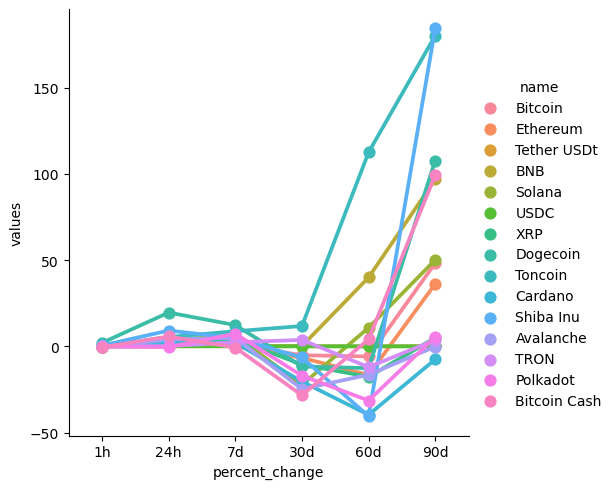

In [52]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [54]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name =='Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,63774.159686,2024-05-04 15:31:11.539564
